## 실습 과제 데이터셋을 활용한 지도학습 모델 적용

1. 인터넷에서 자유롭게 데이터셋 확보

2. 데이터 탐색 및 전처리
- 데이터셋을 로드하고, 결측치 처리, 인코딩, 표준화 등 전처리 과정을 진행
- 데이터의 특성과 분포를 시각화하여 이해
1. 모델 선택 및 학습
- 배운 머신러닝 알고리즘을 적용하여 모델을 학습
- K-최근접 이웃 (K-NN)
- 로지스틱 회귀 (Logistic Regression)
- 서포트 벡터 머신 (SVM)
- 결정 트리 (Decision Tree)
- 랜덤 포레스트 (Random Forest)
- 다층 퍼셉트론 (Multilayer Perceptron)

2. 모델 평가 및 시각화
- 테스트 데이터셋을 사용하여 모델의 성능을 평가
- 혼동 행렬 및 다른 시각화 기법을 사용하여 결과를 시각화

In [37]:
! kaggle datasets download -d nancyalaswad90/lung-cancer

Dataset URL: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 2.60MB/s]


In [38]:
! unzip /content/lung-cancer.zip

Archive:  /content/lung-cancer.zip
  inflating: survey lung cancer.csv  


In [43]:
import pandas as pd

data = pd.read_csv('/content/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [45]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['GENDER', 'LUNG_CANCER'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


In [46]:
# 결측치 파악
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# 중복 데이터 파악
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Duplicate Rows:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
99       M   56        2               1        1              1   
100      M   58        2               1        1              1   
117      F   51        2               2        2              2   
199      F   55        2               1        1              2   
212      M   58        2               1        1              1   
223      M   63        2               2        2              1   
256      M   60        2               1      

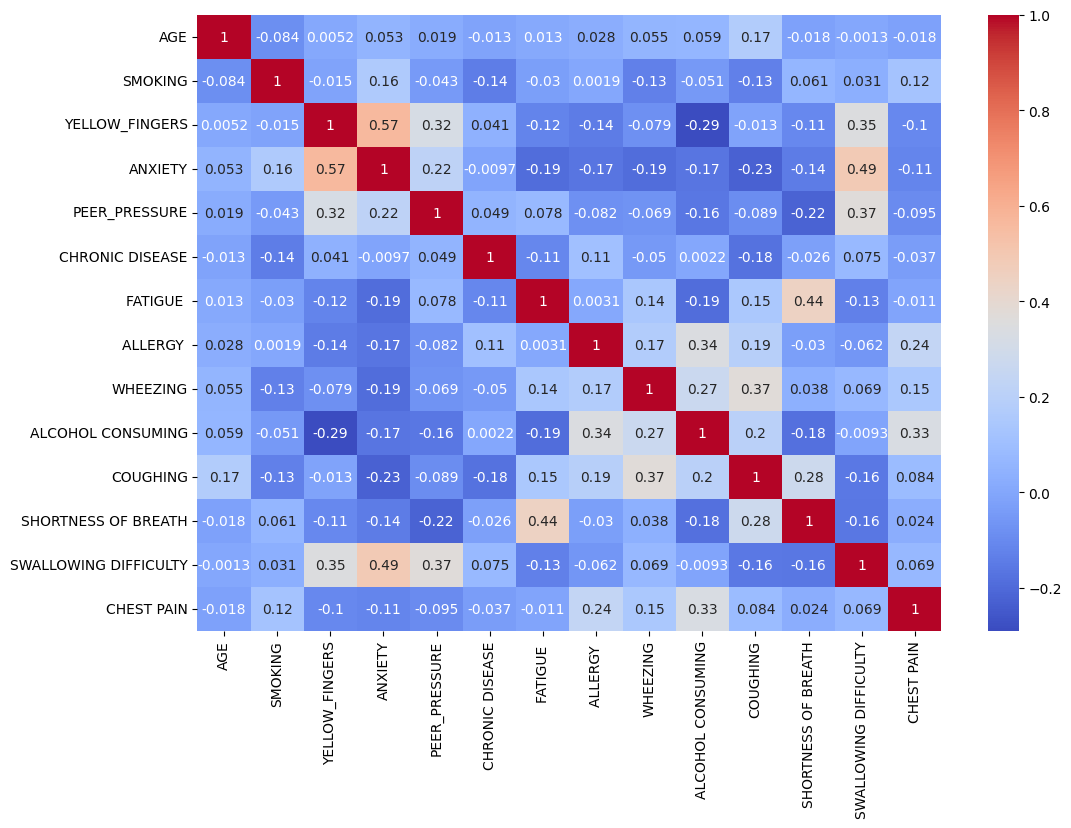

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터만 포함하도록 필터링
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 변수 간 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

- GENDER (object): 설문조사에 참여한 개인의 성별을 나타내는 범주형 변수입니다.

- AGE (int64): 설문조사에 참여한 개인의 나이를 나타내는 숫자형 변수입니다.

- SMOKING (int64): 개인이 흡연을 하는지 여부를 나타내는 숫자형 변수입니다. 흡연하면 1, 그렇지 않으면 0입니다.

- YELLOW_FINGERS (int64): 개인이 황색 손가락을 가지고 있는지 여부를 나타내는 숫자형 변수입니다. 황색 손가락이 있으면 1, 그렇지 않으면 0입니다.

- ANXIETY (int64): 개인이 불안을 겪는지 여부를 나타내는 숫자형 변수입니다. 불안이 있으면 1, 그렇지 않으면 0입니다.

- PEER_PRESSURE (int64): 개인이 또래 압력을 받는지 여부를 나타내는 숫자형 변수입니다. 또래 압력이 있으면 1, 그렇지 않으면 0입니다.

- CHRONIC DISEASE (int64): 개인이 만성 질환을 가지고 있는지 여부를 나타내는 숫자형 변수입니다. 만성 질환이 있으면 1, 그렇지 않으면 0입니다.

- FATIGUE (int64): 개인이 피로를 느끼는지 여부를 나타내는 숫자형 변수입니다. 피로가 있으면 1, 그렇지 않으면 0입니다.

- ALLERGY (int64): 개인이 알레르기를 가지고 있는지 여부를 나타내는 숫자형 변수입니다. 알레르기가 있으면 1, 그렇지 않으면 0입니다.

- WHEEZING (int64): 개인이 쌕쌕거림을 경험하는지 여부를 나타내는 숫자형 변수입니다. 쌕쌕거림이 있으면 1, 그렇지 않으면 0입니다.

- ALCOHOL CONSUMING (int64): 개인이 술을 마시는지 여부를 나타내는 숫자형 변수입니다. 술을 마시면 1, 그렇지 않으면 0입니다.

- COUGHING (int64): 개인이 기침을 하는지 여부를 나타내는 숫자형 변수입니다. 기침이 있으면 1, 그렇지 않으면 0입니다.

- SHORTNESS OF BREATH (int64): 개인이 호흡 곤란을 경험하는지 여부를 나타내는 숫자형 변수입니다. 호흡 곤란이 있으면 1, 그렇지 않으면 0입니다.

- SWALLOWING DIFFICULTY (int64): 개인이 삼키기 어려움을 겪는지 여부를 나타내는 숫자형 변수입니다. 삼키기 어려움이 있으면 1, 그렇지 않으면 0입니다.

- CHEST PAIN (int64): 개인이 가슴 통증을 겪는지 여부를 나타내는 숫자형 변수입니다. 가슴 통증이 있으면 1, 그렇지 않으면 0입니다.

- LUNG_CANCER (object): 개인이 폐암을 가지고 있는지 여부를 나타내는 범주형 변수입니다. 폐암이 있으면 'YES', 그렇지 않으면 'NO'입니다.

### 건강 상태와 습관이 폐암에 미치는 영향을 분석

#### 독립 변수 (X)
-  GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN

#### 종속 변수 (Y)
- LUNG_CANCER: 폐암 여부를 예측하는 것이 목적

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 독립 변수와 종속 변수 설정
X = data[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
          'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING',
          'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']]

y = data['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)  # LUNG_CANCER를 이진형 변수로 변환

# 범주형 변수 GENDER를 숫자로 변환 - M(남자:1), W(여자:0)
X['GENDER'] = X['GENDER'].apply(lambda x: 1 if x == 'M' else 0)

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-50-20b57e0612e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GENDER'] = X['GENDER'].apply(lambda x: 1 if x == 'M' else 0)


#### K-최근접 이웃 (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# K-NN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



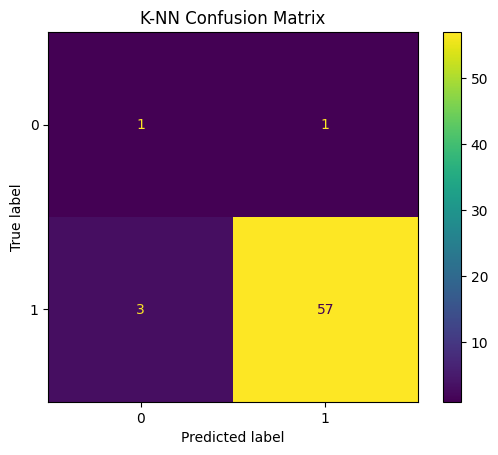

In [54]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("K-NN Confusion Matrix")
plt.show()

#### 로지스틱 회귀 (Logistic Regression)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 로지스틱 회귀 모델 학습
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



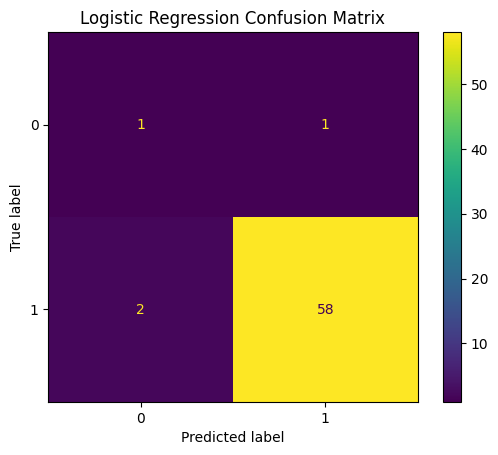

In [56]:
# 혼동 행렬 시각화

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#### 서포트 벡터 머신 (SVM)

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# SVM 모델 학습
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 및 평가
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



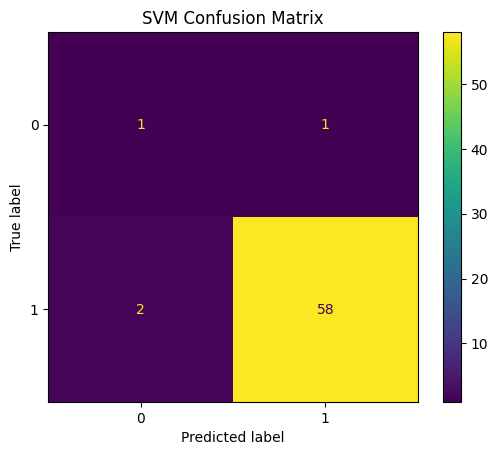

In [59]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

#### Decision Tree (결정 트리)

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 결정 트리 모델 학습
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



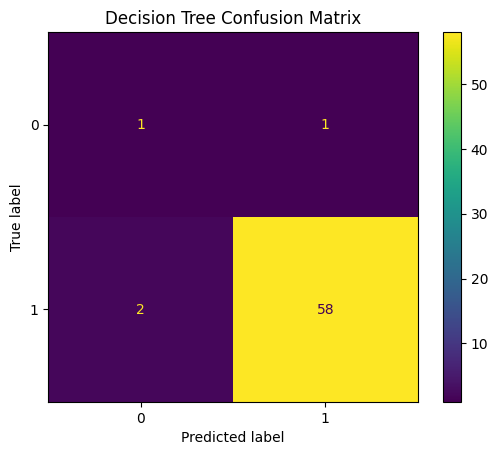

In [61]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

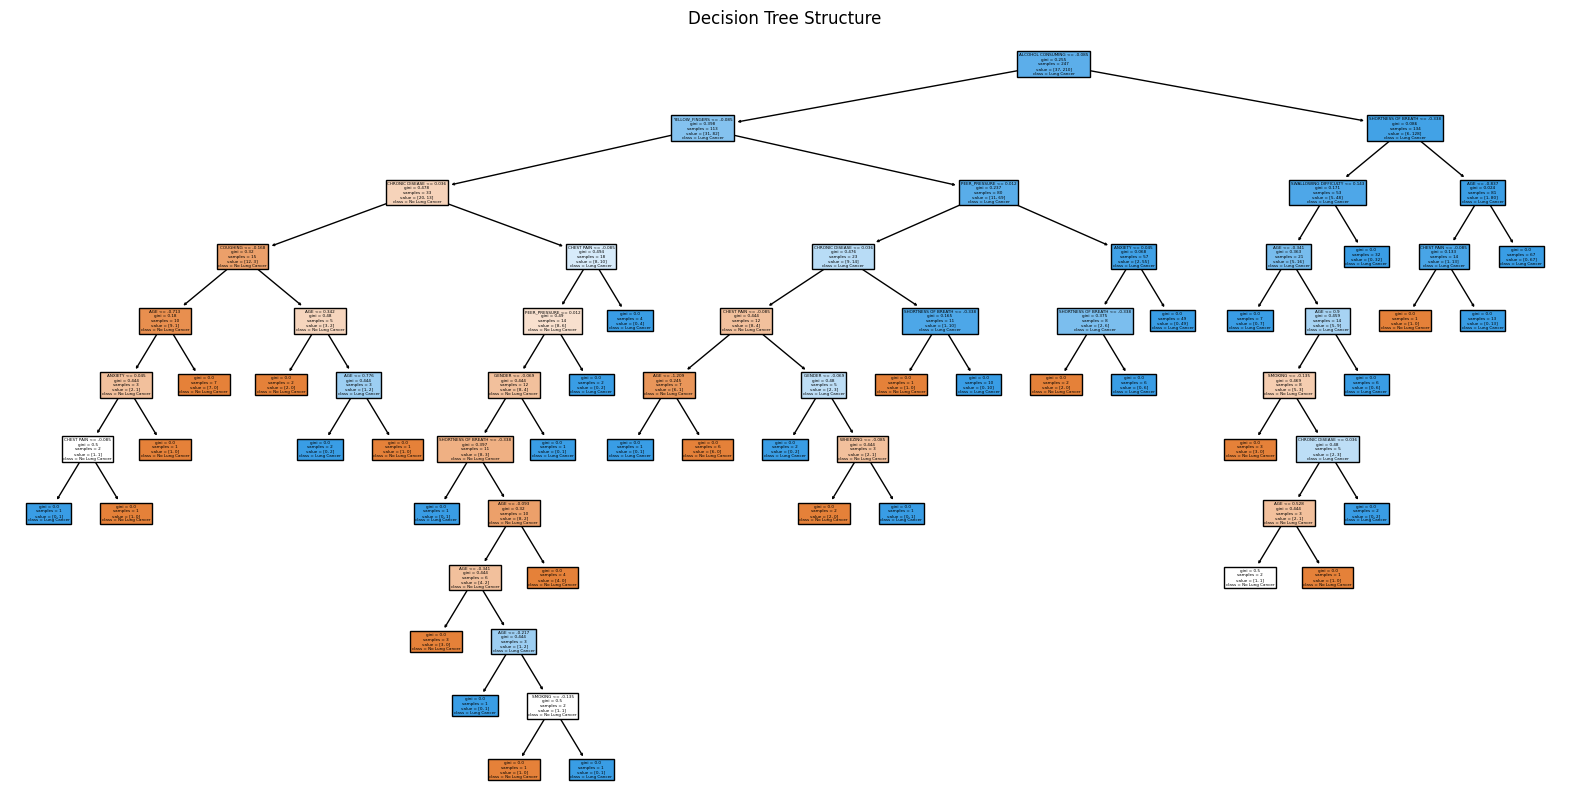

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Decision Tree 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No Lung Cancer', 'Lung Cancer'])
plt.title("Decision Tree Structure")
plt.show()

#### Random Forest (랜덤 포레스트)

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



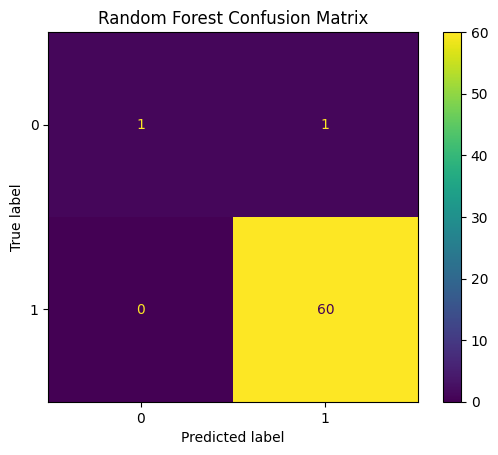

In [66]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

#### MultiLayer Perceptron (다층 퍼셉트론)

In [69]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=0.1)

mlp.fit(X_train, y_train)

# 예측 및 평가
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

Iteration 1, loss = 0.63545829
Iteration 2, loss = 0.44711018
Iteration 3, loss = 0.35313209
Iteration 4, loss = 0.32316080
Iteration 5, loss = 0.30423802
Iteration 6, loss = 0.27781162
Iteration 7, loss = 0.25070942
Iteration 8, loss = 0.23219013
Iteration 9, loss = 0.21902198
Iteration 10, loss = 0.20947316
Iteration 11, loss = 0.19956891
Iteration 12, loss = 0.19247114
Iteration 13, loss = 0.18541812
Iteration 14, loss = 0.18045784
Iteration 15, loss = 0.17496155
Iteration 16, loss = 0.17086598
Iteration 17, loss = 0.16771400
Iteration 18, loss = 0.16577919
Iteration 19, loss = 0.16105033
Iteration 20, loss = 0.15680616
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



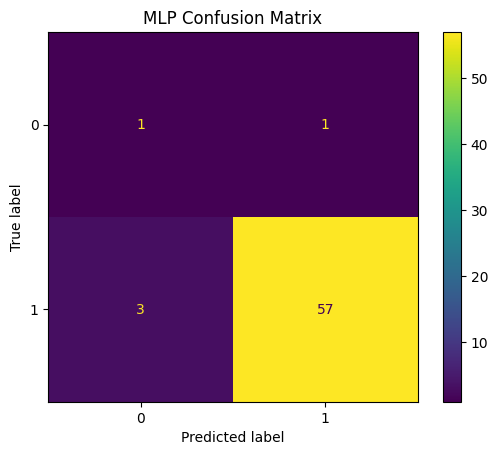

In [70]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.title("MLP Confusion Matrix")
plt.show()